In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:

def graph(df):
    barwidth=1
    edgecolor="white"
    plt.bar(df.Index, df.Malloc, color="#1E2D40", edgecolor=edgecolor, width=barwidth)
    plt.bar(df.Index, df.VectorAdd, bottom=df.Malloc, color="#7897BF", edgecolor=edgecolor, width=barwidth)
    plt.bar(df.Index, df.Memcpy, bottom=df.Malloc + df.VectorAdd, color="#9CB6D9", edgecolor=edgecolor, width=barwidth)
    plt.bar(df.Index, df.Free, bottom=df.Malloc + df.VectorAdd + df.Memcpy, color="#466C8C", edgecolor=edgecolor, width=barwidth)
    plt.legend()
    plt.gcf().set_size_inches(18.5, 10.5)

In [6]:
df = pd.DataFrame()
hardware_type = ["cpu", "gpu"]
for hw in hardware_type:
    _df = pd.read_csv("../data/matmul_{}.csv".format(hw))
    # _df["VectorAdd"] = _df["VectorAdd"] / 100
    _df["Type"] = hw.upper()
    _df["Index"] = np.log2(_df["MatrixSize"])
    df = df.append(_df)
df.describe()


,InitializeA,InitializeB,MatMul,MatrixSize,Index
count,2.600000e+01,2.600000e+01,2.600000e+01,26.000000,26.000000
mean,1.911175e+08,1.137930e+07,1.021837e+07,5040.615385,9.000000
std,1.827212e+08,2.995617e+07,2.528672e+07,9386.604494,3.815757
min,1.265779e+08,5.755300e+04,4.297480e+05,8.000000,3.000000
25%,1.286071e+08,6.328150e+04,5.447578e+05,64.000000,6.000000
50%,1.436349e+08,6.699950e+04,9.583545e+05,512.000000,9.000000
75%,1.461526e+08,2.725677e+06,1.933208e+06,4096.000000,12.000000
max,8.339853e+08,1.155438e+08,9.614381e+07,32768.000000,15.000000


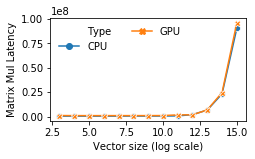

In [11]:

ax = sns.lineplot(data=df, x="Index", y="MatMul", hue="Type", style="Type", dashes=False, markers=True)
ax.set(xlabel="Matrix size (log scale)", ylabel="Matrix Mul Latency")
fig = plt.gcf()

ax = plt.gca()
fig.set_size_inches(3.5, 2.1)
fig.subplots_adjust(bottom=0.2)
ax.legend(title=None, loc='upper left', frameon=False, ncol=2)
fig.savefig("matmul_performance.jpg", dpi=300)
